In [ ]:
!pip install gspread
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive, auth
from google.auth import default
import gspread as gd
import pandas as pd

In [ ]:
drive.mount ('/content/drive')
auth.authenticate_user()

creds,_ = default()

gc = gd.authorize(creds)

Mounted at /content/drive


In [ ]:
data_mentor = gc.open('DATA_MYMENTOR').worksheet("Mentor")
data_mentee = gc.open('DATA_MYMENTOR').worksheet("Mentee")
data_mentee_topic_choices = gc.open('DATA_MYMENTOR').worksheet("Topic_Choices")

In [ ]:
data1 = data_mentor.get_all_values()
mentor = pd.DataFrame(data1)
mentor = mentor.shift(-1)
mentor.columns = ['Name','Latest Education','Educational Background','Experience','Work Position','Role','Rating','Profile Views']
mentor = mentor.iloc[:-1]
display(mentor)

,Name,Latest Education,Educational Background,Experience,Work Position,Role,Rating,Profile Views
0,Budi Sumarto,S1,Industrial Technology,>10 years,Software Engineer,Hacker,4.7,9228
1,Dian Sastrowardoyo,S2,Industrial Technology,5-10 years,Front End Developer,Hacker,4.8,10170
2,Joko Anwar,S3,Civil Engineering,<5 years,Database Administrator,Hacker,4.9,9407
3,Agnes Monica,D3,Information Technology,5-10 years,Web Developer,Hacker,4.2,9446
4,Raisa Andriana,S1,Civil Engineering,>10 years,Information Security Analyst,Hacker,3.9,15107
...,...,...,...,...,...,...,...,...
295,Dewi Nugraha,D3,Digital Arts,<5 years,Digital Strategist,Hipster,4.1,8353
296,Dini Dewi,D4,Industrial and product Design,>10 years,Graphic Designer,Hipster,4.6,7076
297,Dicky Wijaya,S1,Commercial and Advertising Arts,<5 years,Digital Strategist,Hipster,4.6,9526
298,Dinda Susanto,S2,Visual Communication Design,<5 years,Graphic Designer,Hipster,3.9,5469


In [ ]:
data2 = data_mentee.get_all_values()
mentee = pd.DataFrame(data2)
mentee = mentee.shift(-1)
mentee.columns = ['Name','Latest Education','Educational Background','Role','Topic 1','Topic 2', 'Topic 3','Rating']
mentee = mentee.iloc[:-1]
display(mentee)

,Name,Latest Education,Educational Background,Role,Topic 1,Topic 2,Topic 3,Rating
0,Bachrul Uluum,D3,Civil Engineering,Hacker,Web Developer,Computer Networking Specialist,Database Administrator,4.166666667
1,Ihlasul Mufti Faqih,S1,Information Technology,Hacker,Data Scientist,Back End Developer,Full Stack Developer,3.9
2,Raditya Widi Indarsanto,SMA,Science Studies,Hacker,Data Scientist,Software Engineer,AI Specialist,4.5
3,Benneth Sinto Briliant Siburian,D4,Industrial Technology,Hacker,Software Engineer,AI Specialist,Front End Developer,3.8
4,I Gusti Bagus Ardavendra,D3,Information Technology,Hacker,AI Specialist,Back End Developer,Computer Networking Specialist,4.3
...,...,...,...,...,...,...,...,...
295,Nabila Dewi,D4,Industrial and product Design,Hipster,Digital Strategist,Creative Officer,Digital Strategist,4.333333333
296,Nadia Prasetyo,D3,Commercial and Advertising Arts,Hipster,Graphic Designer,Art Director,Creative Officer,4.5
297,Nathan Wijaya,SMA,Science Studies,Hipster,Art Director,Graphic Designer,UI/UX Designer,4.2
298,Nia Santoso,S1,Visual Communication Design,Hipster,Art Director,UI/UX Designer,Graphic Designer,3.7


Preprocessing Data Mentor

In [ ]:
mentor['Preferensi'] = mentor[['Latest Education','Educational Background', 'Experience', 'Work Position', 'Role']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [ ]:
dfdata_mentor = mentor[['Name','Preferensi','Rating']]
dfdata_mentor

,Name,Preferensi,Rating
0,Budi Sumarto,"S1, Industrial Technology, >10 years, Software...",4.7
1,Dian Sastrowardoyo,"S2, Industrial Technology, 5-10 years, Front E...",4.8
2,Joko Anwar,"S3, Civil Engineering, <5 years, Database Admi...",4.9
3,Agnes Monica,"D3, Information Technology, 5-10 years, Web De...",4.2
4,Raisa Andriana,"S1, Civil Engineering, >10 years, Information ...",3.9
...,...,...,...
295,Dewi Nugraha,"D3, Digital Arts, <5 years, Digital Strategist...",4.1
296,Dini Dewi,"D4, Industrial and product Design, >10 years, ...",4.6
297,Dicky Wijaya,"S1, Commercial and Advertising Arts, <5 years,...",4.6
298,Dinda Susanto,"S2, Visual Communication Design, <5 years, Gra...",3.9


In [ ]:
# List kata-kata tag
list_tag = ["Data Analyst", "Data Engineer", "Data Scientist", "Front end Developer", "Back end Developer", "Full Stack Developer", "Web Developer", "Software Engineer", "Information Security Analyst", "AI Specialist", "Computer Networking Specialist", "Database Administrator", "Business Development", "Technopreneur", "Business Consultant", "Risk Manager", "Product Manager", "Market Researcher", "Financial Analyst", "Digital Marketing", "Entrepreneur", "Digital Business Analysis", "Operational Manager", "Retail Manager", "Executive Business", "Graphic Designer", "UI/UX designer", "Product Developer", "Art Director", "Web Designer", "Art Entrepreneur"] 

# Fungsi untuk mencari kata dalam preferensi
def cari_kata(Preferensi):
    kata_ditemukan = []
    Preferensi_lower = Preferensi.lower() # Mengubah preferensi menjadi huruf kecil
    
    for tag in list_tag:
        tag_lower = tag.lower() # Mengubah tag menjadi huruf kecil
        
        if tag_lower in Preferensi_lower:
            kata_ditemukan.append(tag)
    
    return kata_ditemukan

# Membuat kolom tag
dfdata_mentor['tag'] = dfdata_mentor['Preferensi'].apply(cari_kata)

<ipython-input-9-2112c0b8ea5a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata_mentor['tag'] = dfdata_mentor['Preferensi'].apply(cari_kata)


In [ ]:
dfdata_mentor

,Name,Preferensi,Rating,tag
0,Budi Sumarto,"S1, Industrial Technology, >10 years, Software...",4.7,[Software Engineer]
1,Dian Sastrowardoyo,"S2, Industrial Technology, 5-10 years, Front E...",4.8,[Front end Developer]
2,Joko Anwar,"S3, Civil Engineering, <5 years, Database Admi...",4.9,[Database Administrator]
3,Agnes Monica,"D3, Information Technology, 5-10 years, Web De...",4.2,[Web Developer]
4,Raisa Andriana,"S1, Civil Engineering, >10 years, Information ...",3.9,[Information Security Analyst]
...,...,...,...,...
295,Dewi Nugraha,"D3, Digital Arts, <5 years, Digital Strategist...",4.1,[]
296,Dini Dewi,"D4, Industrial and product Design, >10 years, ...",4.6,[Graphic Designer]
297,Dicky Wijaya,"S1, Commercial and Advertising Arts, <5 years,...",4.6,[]
298,Dinda Susanto,"S2, Visual Communication Design, <5 years, Gra...",3.9,[Graphic Designer]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Mengambil nilai rating dari dataframe
ratings = dfdata_mentor['Rating'].values.reshape(-1, 1)

# Melakukan normalisasi fitur rating
normalized_ratings = scaler.fit_transform(ratings)

# Menyimpan hasil normalisasi ke dalam kolom "normalized_rating"
dfdata_mentor['Rating'] = normalized_ratings

# Tampilkan dataframe dengan fitur rating yang telah dinormalisasi
print(dfdata_mentor)

                   Name                                         Preferensi  \
0          Budi Sumarto  S1, Industrial Technology, >10 years, Software...   
1    Dian Sastrowardoyo  S2, Industrial Technology, 5-10 years, Front E...   
2            Joko Anwar  S3, Civil Engineering, <5 years, Database Admi...   
3          Agnes Monica  D3, Information Technology, 5-10 years, Web De...   
4        Raisa Andriana  S1, Civil Engineering, >10 years, Information ...   
..                  ...                                                ...   
295        Dewi Nugraha  D3, Digital Arts, <5 years, Digital Strategist...   
296           Dini Dewi  D4, Industrial and product Design, >10 years, ...   
297        Dicky Wijaya  S1, Commercial and Advertising Arts, <5 years,...   
298       Dinda Susanto  S2, Visual Communication Design, <5 years, Gra...   
299         Dian Wibowo  S1, Digital Arts, 5-10 years, Art Director, Hi...   

     Rating                             tag  
0      0.85      

<ipython-input-11-1334e335f651>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdata_mentor['Rating'] = normalized_ratings


In [ ]:
import nltk
nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

class Mentee:
    def __init__(self, name, needs):
        self.name = name
        self.needs = needs

class Mentor:
    def __init__(self, name, expertise, rating):
        self.name = name
        self.expertise = expertise
        self.rating = rating

class MentoringPlatform:
    def __init__(self):
        self.mentees = []
        self.mentors = []
        self.vectorizer = TfidfVectorizer()

    def add_mentee(self, mentee):
        self.mentees.append(mentee)

    def add_mentor(self, mentor):
        self.mentors.append(mentor)

    def preprocess_text(self, text):
        stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        preprocessed_text = ' '.join(filtered_tokens)
        return preprocessed_text

    def fit_vectorizer(self):
        corpus = []
        for mentee in self.mentees:
            corpus.append(self.preprocess_text(mentee.needs))
        for mentor in self.mentors:
            corpus.append(self.preprocess_text(mentor.expertise))
        self.vectorizer.fit(corpus)

    def find_mentor(self, mentee):
        mentee_needs = self.preprocess_text(mentee.needs)
        mentee_vector = self.vectorizer.transform([mentee_needs])

        matched_mentors = []
        for mentor in self.mentors:
            mentor_expertise = self.preprocess_text(mentor.expertise)
            mentor_vector = self.vectorizer.transform([mentor_expertise])

            similarity_score = cosine_similarity(mentee_vector, mentor_vector)[0][0]
            if similarity_score > 0:
                matched_mentors.append((mentor, similarity_score))
        matched_mentors = sorted(matched_mentors, key=lambda x: (x[1] + x[0].rating), reverse=True)

        return matched_mentors

# Contoh penggunaan:
platform = MentoringPlatform()

# Menambahkan mentees dan mentors ke platform
mentee1 = Mentee("Mentee 1", "Web Developer")
mentee2 = Mentee("Mentee 2", "Software Engineer")
mentee3 = Mentee("Mentee 3", "Data Analyst")
platform.add_mentee(mentee1)
platform.add_mentee(mentee2)
platform.add_mentee(mentee3)

for index, row in dfdata_mentor.iterrows():
    mentor_expertise = ' '.join(row['Preferensi'].split()[:10])  # Mengambil maksimal 10 kata dari mentor.expertise
    mentor = Mentor(row['Name'], mentor_expertise, row['Rating'])
    platform.add_mentor(mentor)

# Fitting vectorizer
platform.fit_vectorizer()

# Melakukan pencocokan mentee dengan mentor
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        print(f"Mentee '{mentee.name}' cocok dengan mentor:")
        for mentor, similarity_score in matched_mentors:
            print(f"- {mentor.name} ({mentor.expertise}) - Similarity Score: {similarity_score} - Rating: {mentor.rating}")
    else:
        print(f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")

Mentee 'Mentee 1' cocok dengan mentor:
- Pandji Pragiwaksono (S2, Information Technology, 5-10 years, Web Developer, Hacker) - Similarity Score: 0.3108566759734002 - Rating: 0.8500000000000001
- Vino Bastian (D3, Information Technology, >10 years, Front End Developer, Hacker) - Similarity Score: 0.07759460979632869 - Rating: 1.0
- Sherina Munaf (S1, Information Technology, >10 years, Front End Developer, Hacker) - Similarity Score: 0.07759460979632869 - Rating: 1.0
- Titiek Puspa (D3, Information Technology, 5-10 years, Front End Developer, Hacker) - Similarity Score: 0.07759460979632869 - Rating: 1.0
- Nicholas Saputra (S2, Information Technology, <5 years, Web Developer, Hacker) - Similarity Score: 0.3108566759734002 - Rating: 0.75
- Rano Karno (D4, Information Technology, <5 years, Web Developer, Hacker) - Similarity Score: 0.3108566759734002 - Rating: 0.7000000000000002
- Budi Setiawan (S1, Digital Arts, <5 years, Product Developer, Hipster) - Similarity Score: 0.1040144212867982 -

In [ ]:
from sklearn.model_selection import train_test_split
dfdata_mentor_train = train_test_split( dfdata_mentor, train_size=0.80, shuffle=True)
dfdata_mentor_test = train_test_split( dfdata_mentor, train_size=0.80, shuffle=True)

In [ ]:
dfdata_mentor_train

[                      Name                                         Preferensi  \
 30          Adipati Dolken  S1, Industrial Technology, >10 years, Data Sci...   
 208  Ivananda Pratama Arwi  S1, Industrial and product Design, <5 years, D...   
 115             Lisa Davis  S1, Administration Business, 5-10 years, Finan...   
 10        Endang S Taurina  S3, Business Statistics, <5 years, Information...   
 246          Khatlyn Della  S1, Commercial and Advertising Arts, <5 years,...   
 ..                     ...                                                ...   
 189          Andika Wijaya  S1, Marketing, 5-10 years, Digital Marketing, ...   
 223           Naufal Rifqi  D4, Digital Arts, 5 - 10 years, UI/UX Designer...   
 125            Emma Taylor  D3, Management, 5-10 years, Executive Business...   
 65               Luna Maya  S3, Business Statistics, 5-10 years, AI Specia...   
 227   Faizal Surya Prabowo  S2, Industrial and product Design, 5 - 10 year...   
 
      Rating  

In [ ]:
matched_count = 0
total_mentees = len(platform.mentees)
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        matched_count += 1
accuracy = matched_count / total_mentees
print(accuracy)

1.0


In [ ]:
k = 3  # Jumlah pilihan teratas yang ingin dievaluasi
matched_count = 0
total_mentees = len(platform.mentees)
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    top_k_mentors = matched_mentors[:k]
    if len(top_k_mentors) > 0:
        if mentee in [mentor[0] for mentor in top_k_mentors]:
            matched_count += 1
top_k_accuracy = matched_count / total_mentees
print(top_k_accuracy)

0.0


In [ ]:
total_similarity_score = 0
total_matches = 0
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        total_matches += 1
        total_similarity_score += sum([mentor[1] for mentor in matched_mentors])
mean_similarity_score = total_similarity_score / total_matches
print(mean_similarity_score)

8.56737381256765


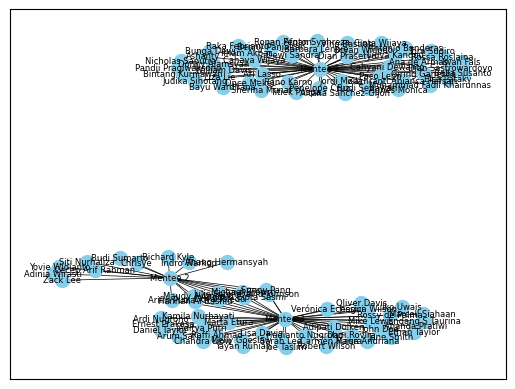

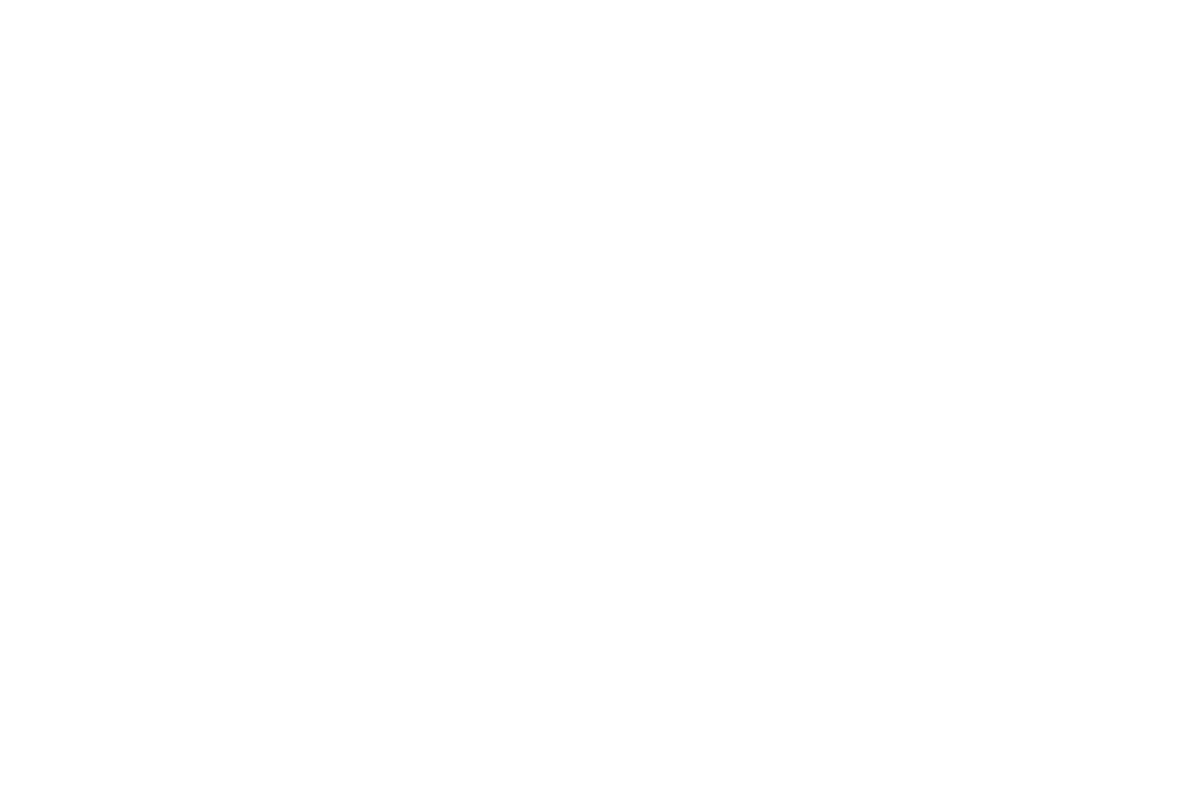

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# ... (previous code remains the same)

# Melakukan pencocokan mentee dengan mentor
graph = nx.Graph()
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        for mentor, similarity_score in matched_mentors:
            graph.add_edge(mentee.name, mentor.name)
    else:
        print(f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")

# Visualisasi grafik dengan gambar yang lebih besar dan garis yang lebih panjang
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=100)
nx.draw_networkx_labels(graph, pos, font_size=6, font_family='sans-serif')
nx.draw_networkx_edges(graph, pos, width=0.5)  # Mengatur lebar garis menjadi 2.0
plt.figure(figsize=(15, 10))  # Menentukan ukuran gambar
plt.axis('off')
plt.show()

In [ ]:
result = dfdata_mentor.loc[dfdata_mentor['Name'] == 'Dini Dewi', 'Preferensi']
# Mengatur opsi untuk mencetak semua kata pada kolom 'preferensi'
pd.set_option('display.max_colwidth', None)

# Menampilkan kolom 'preferensi' dari dataframe 'mentor'
print(result)

296    D4, Industrial and product Design, >10 years, Graphic Designer, Hipster
Name: Preferensi, dtype: object


In [ ]:
dfdata_mentor.loc[65]

Name                                                           Luna Maya
Preferensi    S3, Business Statistics, 5-10 years, AI Specialist, Hacker
Rating                                                              0.45
tag                                                      [AI Specialist]
Name: 65, dtype: object

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fuzzywuzzy import fuzz

class MentoringPlatform:
    # ...

    def find_mentor(self, mentee):
        mentee_needs = self.preprocess_text(mentee.needs)
        mentee_vector = self.vectorizer.transform([mentee_needs])

        matched_mentors = []
        for mentor in self.mentors:
            mentor_expertise = self.preprocess_text(mentor.expertise)
            mentor_vector = self.vectorizer.transform([mentor_expertise])

            similarity_score = cosine_similarity(mentee_vector, mentor_vector)[0][0]

            # Melakukan fuzzy matching untuk menemukan kata-kata yang mirip
            typo_ratio = fuzz.ratio(mentee_needs, mentor_expertise)
            if similarity_score > 0 or typo_ratio >= 80:
                matched_mentors.append((mentor, similarity_score))

        matched_mentors = sorted(matched_mentors, key=lambda x: (x[1] + x[0].rating), reverse=True)

        return matched_mentors

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.9 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline


fix_spelling = pipeline("text2text-generation",model="oliverguhr/spelling-correction-english-base")

print(fix_spelling("I want to loking for a mentrr who experience with Web Develope",max_length=2048))

[{'generated_text': 'I want to look for a mentor who experience with Web development.'}]
